In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('/content/Raw_fulldata_FEDFUNDS.csv', parse_dates=['DATE'], index_col='DATE')

# Verify the data has been loaded correctly
print("First few rows of the dataset:")
print(data.head())
print("\nDataset Information:")
print(data.info())


First few rows of the dataset:
            Industrial_Prod_Index  Housing_price_index          GDP     PCE  \
DATE                                                                          
1975-02-28                40.4252            51.086331  1628.028333   989.4   
1975-03-31                39.9804            51.172662  1639.940667   990.6   
1975-04-30                40.0572            51.258993  1651.853000   995.0   
1975-05-31                39.9402            51.345324  1671.175333  1018.9   
1975-06-30                40.1927            51.431655  1690.497667  1026.8   

            Unemployment_rate  USD_EUR_Exchange_Price  Prime_Lending_Rate  \
DATE                                                                        
1975-02-28                8.1                  0.7222                8.96   
1975-03-31                8.6                  0.7374                7.93   
1975-04-30                8.8                  0.7394                7.50   
1975-05-31                9.0 

<ipython-input-2-a94c7464ec1d>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('/content/Raw_fulldata_FEDFUNDS.csv', parse_dates=['DATE'], index_col='DATE')


In [ ]:
# Inspect unique values in the SNP_CLOSING column
print(data['SNP_CLOSING'].unique())

# Check for non-numeric entries
print(data['SNP_CLOSING'].apply(lambda x: type(x)).value_counts())

['80.1' '83.78' '84.72' '90.1' '92.4' '92.49' '85.71' '84.67' '88.57'
 '90.07' '88.7' '96.86' '100.6' '101.1' '101.9' '101.2' '101.8' '104.2'
 '103.3' '105.5' '104.7' '103.8' '101' '99.05' '98.76' '99.29' '100.2'
 '97.75' '96.23' '93.74' '94.28' '93.82' '90.25' '88.98' '88.82' '92.71'
 '97.41' '97.66' '97.19' '103.9' '94.71' '96.11' '99.71' '98.23' '100.1'
 '102.1' '99.73' '101.7' '102.7' '107.4' '108.6' '104.5' '103.7' '107.8'
 '110.9' '115.3' '103' '107.7' '114.6' '119.8' '123.5' '126.5' '130.2'
 '135.7' '133.5' '133' '128.4' '133.2' '134.4' '131.7' '132.3' '129.1'
 '129.6' '118.3' '122.9' '123.8' '117.3' '114.5' '110.8' '116.3' '116.4'
 '109.7' '109.4' '122.4' '132.7' '138.1' '139.4' '144.3' '146.8' '151.9'
 '157.7' '164.1' '166.4' '167' '162.4' '167.2' '167.7' '165.2' '164.4'
 '157.3' '157.4' '157.6' '156.6' '153.1' '151.1' '166.1' '164.8' '166.3'
 '164.5' '171.6' '180.9' '179.4' '180.6' '184.9' '188.9' '192.5' '188.3'
 '184.1' '186.2' '197.5' '207.3' '208.2' '219.4' '232.3' '238' 

In [ ]:
# Remove commas and spaces (if any), then convert to numeric
data['SNP_CLOSING'] = data['SNP_CLOSING'].str.replace(',', '').str.strip()

# Convert the column to float
data['SNP_CLOSING'] = pd.to_numeric(data['SNP_CLOSING'], errors='coerce')

In [ ]:
# Check for missing values in the SNP_CLOSING column
print(data['SNP_CLOSING'].isnull().sum())

# Fill missing values with forward fill or another strategy
data['SNP_CLOSING'].fillna(method='ffill', inplace=True)

1


<ipython-input-8-5f09b112fe0c>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['SNP_CLOSING'].fillna(method='ffill', inplace=True)
<ipython-input-8-5f09b112fe0c>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['SNP_CLOSING'].fillna(method='ffill', inplace=True)


In [ ]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 1975-02-28 to NaT
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Industrial_Prod_Index   597 non-null    float64
 1   Housing_price_index     597 non-null    float64
 2   GDP                     597 non-null    float64
 3   PCE                     597 non-null    float64
 4   Unemployment_rate       597 non-null    float64
 5   USD_EUR_Exchange_Price  597 non-null    float64
 6   Prime_Lending_Rate      597 non-null    float64
 7   Consumer_Sentiment      597 non-null    float64
 8   SNP_CLOSING             598 non-null    float64
 9   FEDFUNDS                597 non-null    float64
dtypes: float64(10)
memory usage: 51.4 KB
None


In [ ]:
# Get descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe().transpose())


Descriptive Statistics:
                        count          mean          std          min  \
Industrial_Prod_Index   597.0     78.645125    20.846635    39.940200   
Housing_price_index     597.0    125.490628    70.067451    51.086331   
GDP                     597.0  11248.524090  7299.638555  1628.028333   
PCE                     597.0   7470.522613  5005.578336   989.400000   
Unemployment_rate       597.0      6.160469     1.771260     3.400000   
USD_EUR_Exchange_Price  597.0      0.868556     0.142969     0.634100   
Prime_Lending_Rate      597.0      7.329698     3.526935     3.250000   
Consumer_Sentiment      597.0     84.648628    13.286025    46.577502   
SNP_CLOSING             598.0   1229.391672  1246.126525    80.100000   
FEDFUNDS                597.0      4.688861     3.924402     0.050000   

                              25%          50%          75%         max  
Industrial_Prod_Index     58.2421    87.726000     98.65520    104.1038  
Housing_price_index    

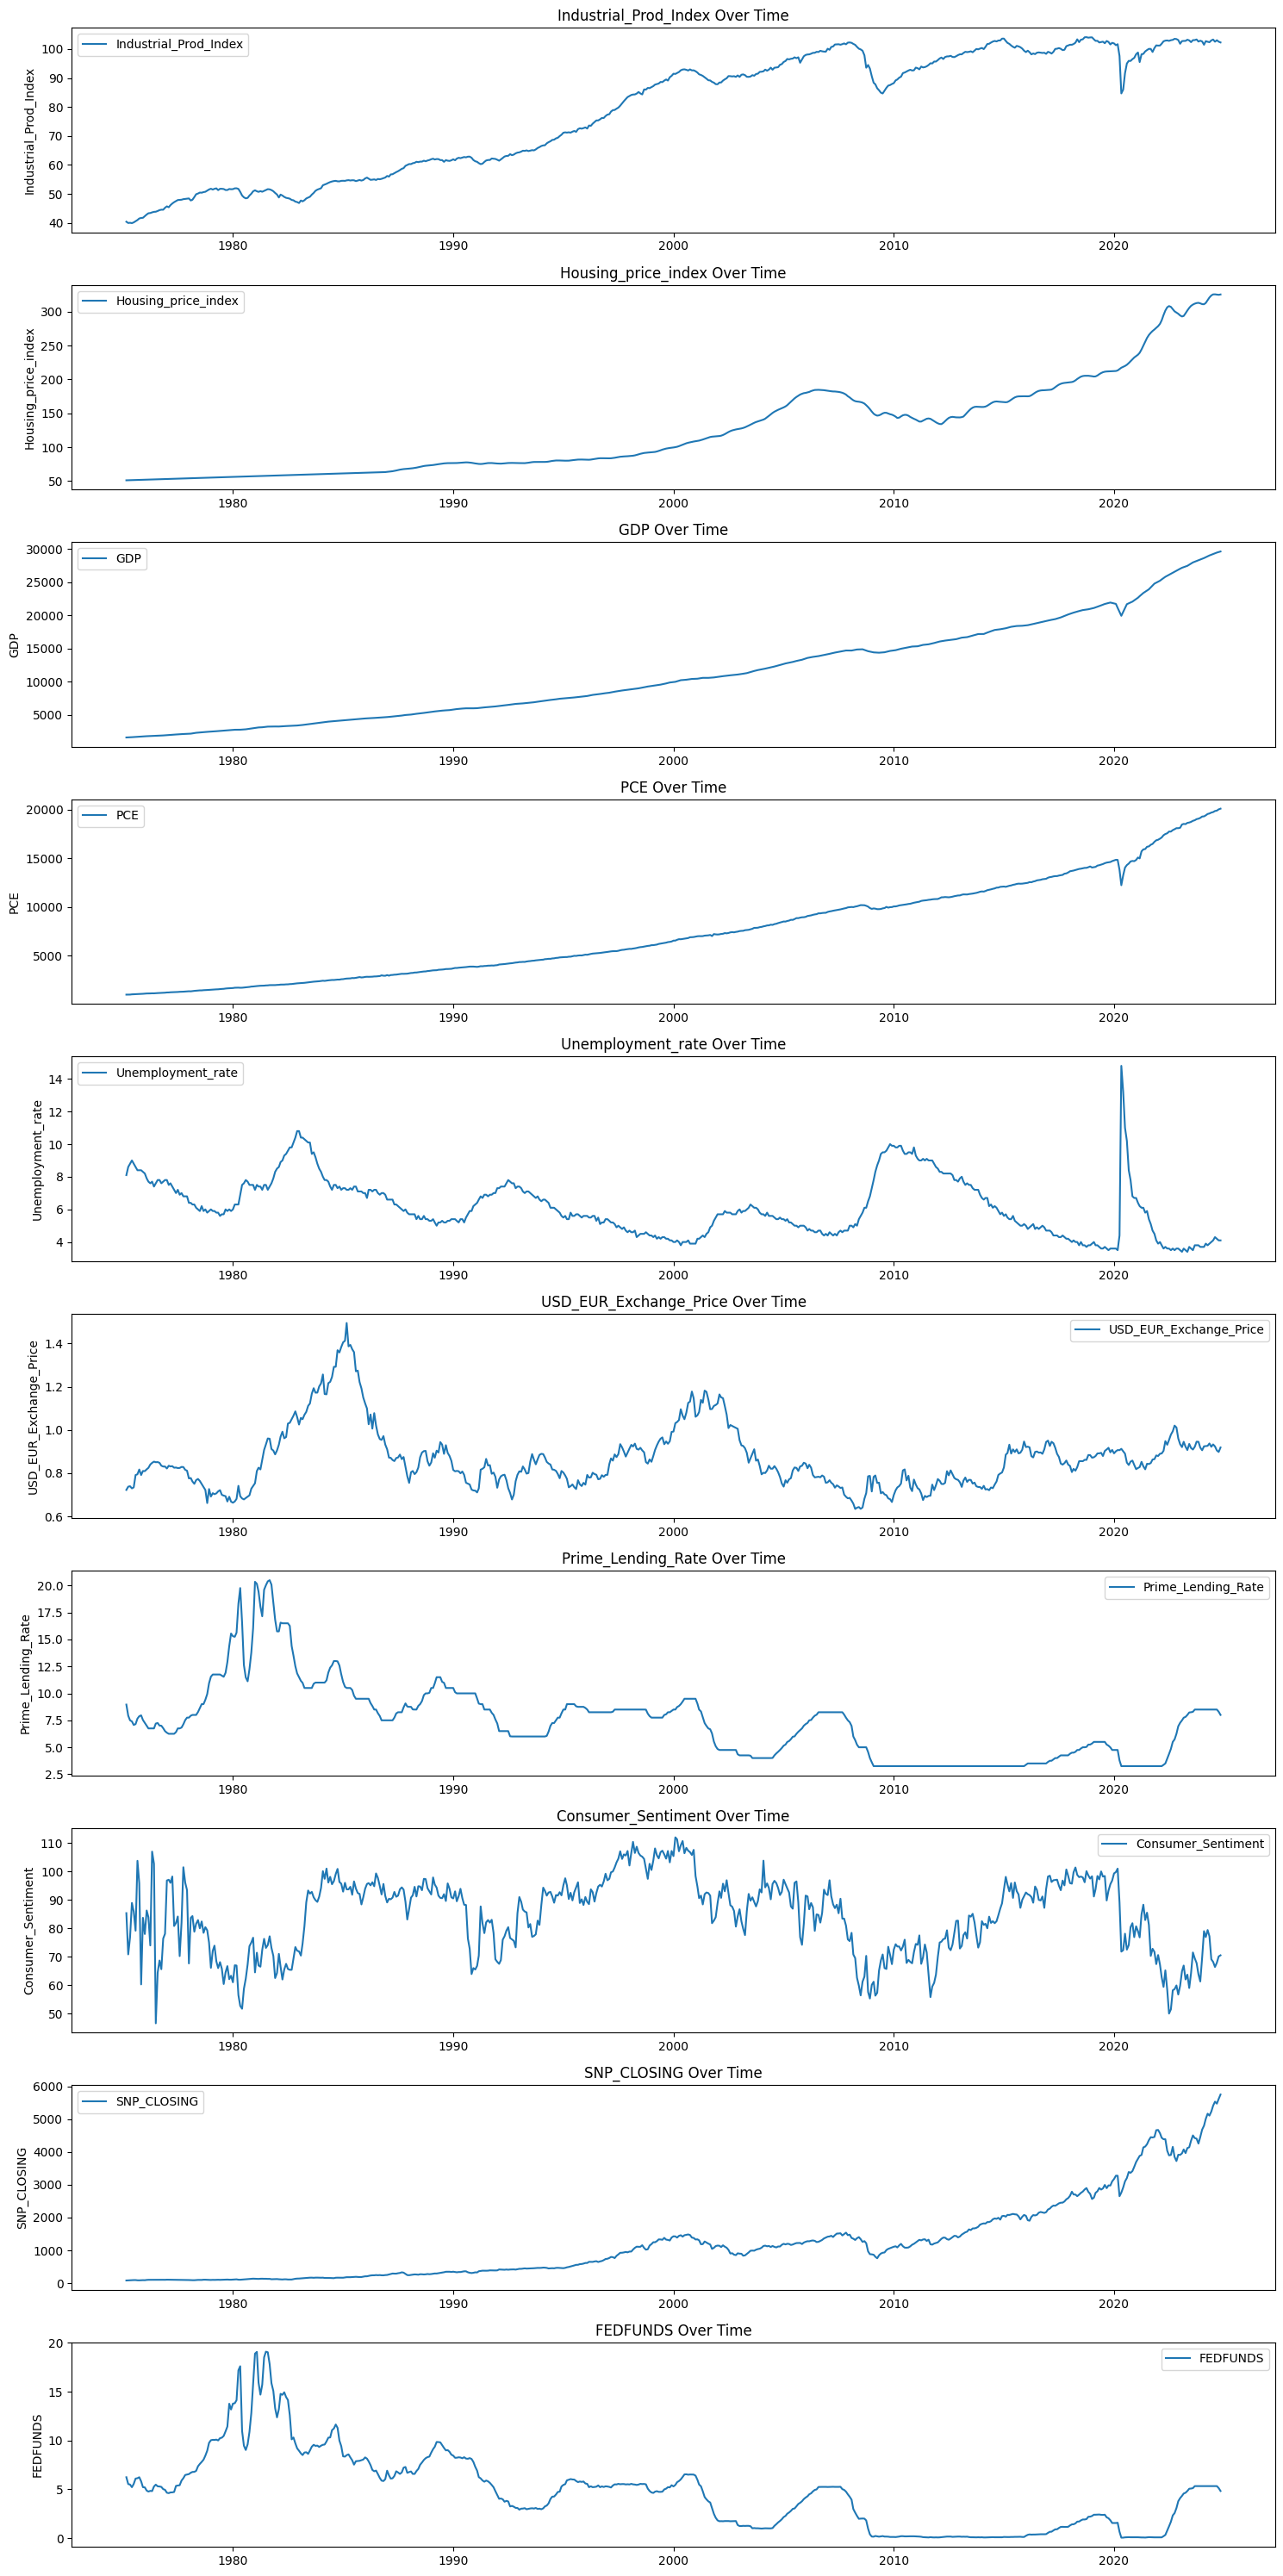

In [ ]:
# Plot each variable over time
variables = data.columns
num_vars = len(variables)
plt.figure(figsize=(15, num_vars * 3))

for i, var in enumerate(variables):
    plt.subplot(num_vars, 1, i + 1)
    plt.plot(data.index, data[var].values, label=var)
    plt.title(f'{var} Over Time')
    plt.ylabel(var)
    plt.legend(loc='best')

plt.tight_layout()
plt.show()


Correlation Matrix:
                        Industrial_Prod_Index  Housing_price_index       GDP  \
Industrial_Prod_Index                1.000000             0.836957  0.895576   
Housing_price_index                  0.836957             1.000000  0.974056   
GDP                                  0.895576             0.974056  1.000000   
PCE                                  0.896586             0.973905  0.999765   
Unemployment_rate                   -0.487730            -0.438193 -0.411424   
USD_EUR_Exchange_Price              -0.121793            -0.073453 -0.081409   
Prime_Lending_Rate                  -0.660493            -0.519054 -0.602268   
Consumer_Sentiment                   0.057011            -0.211045 -0.147114   
SNP_CLOSING                          0.769653             0.957226  0.948239   
FEDFUNDS                            -0.730688            -0.574403 -0.661900   

                             PCE  Unemployment_rate  USD_EUR_Exchange_Price  \
Industrial_Prod_Ind

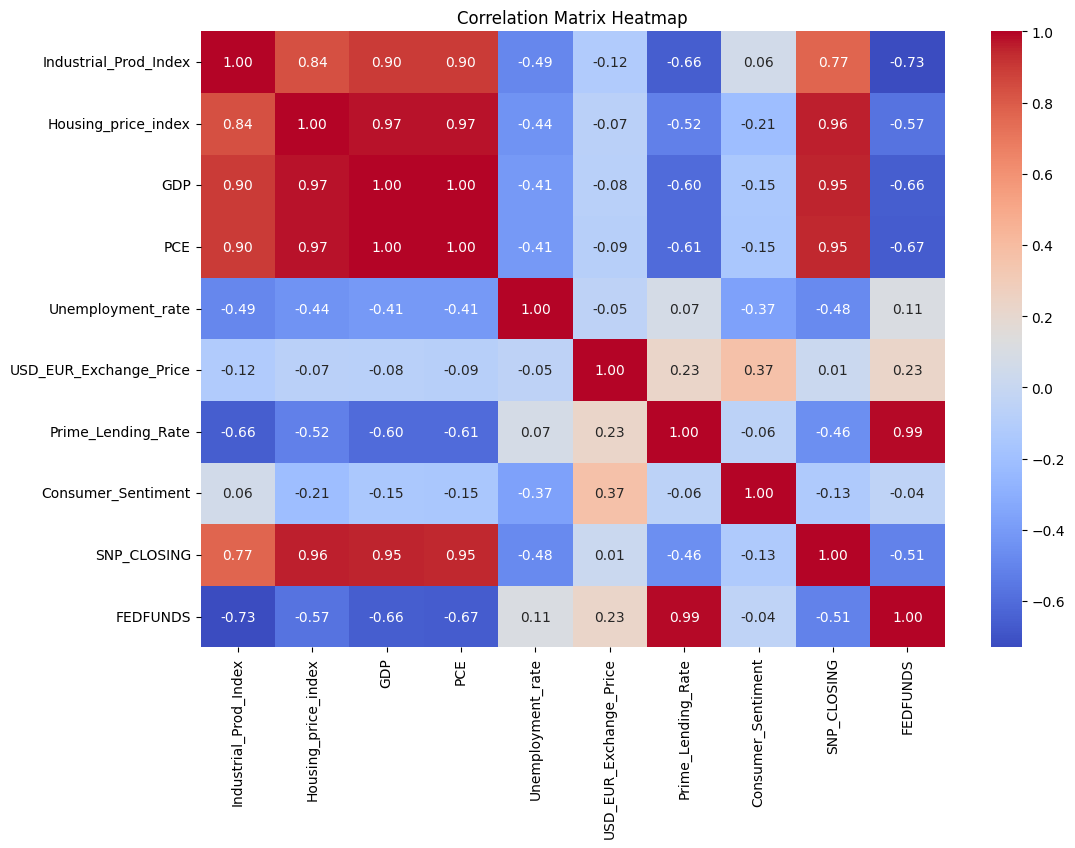

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Why scale the data?

LSTM models perform better when all features are on the same scale. That here would be in the range [0,1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Step 3.1: Handle Missing Values
# Fill missing values with forward fill (you can choose other methods if needed)
data.fillna(method='ffill', inplace=True)

# Verify if any missing values remain
print("Missing Values After Filling:")
print(data.isnull().sum())

# Step 3.2: Select Relevant Features
# Based on correlation analysis, we choose the most relevant predictors for FEDFUNDS
selected_columns = [
    'Prime_Lending_Rate',
    'GDP',
    'Industrial_Prod_Index',
    'PCE',
    'USD_EUR_Exchange_Price',
    'Housing_price_index',
    'FEDFUNDS'  # Include the target variable
]
data_selected = data[selected_columns]

# Step 3.3: Normalize Data
# Normalize all columns to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_selected)

# Convert the scaled data back to a DataFrame for better readability
data_scaled = pd.DataFrame(scaled_data, columns=selected_columns, index=data.index)

# Step 3.4: Verify the Preprocessed Data
print("\nScaled Data Sample:")
print(data_scaled.head())

Missing Values After Filling:
Industrial_Prod_Index     0
Housing_price_index       0
GDP                       0
PCE                       0
Unemployment_rate         0
USD_EUR_Exchange_Price    0
Prime_Lending_Rate        0
Consumer_Sentiment        0
SNP_CLOSING               0
FEDFUNDS                  0
dtype: int64

Scaled Data Sample:
            Prime_Lending_Rate       GDP  Industrial_Prod_Index       PCE  \
DATE                                                                        
1975-02-28            0.331014  0.000000               0.007559  0.000000   
1975-03-31            0.271304  0.000426               0.000627  0.000063   
1975-04-30            0.246377  0.000851               0.001823  0.000293   
1975-05-31            0.240580  0.001542               0.000000  0.001544   
1975-06-30            0.221449  0.002232               0.003935  0.001957   

            USD_EUR_Exchange_Price  Housing_price_index  FEDFUNDS  
DATE                                            

<ipython-input-14-808f741e7a21>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Preparing data for LSTM input sequences

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Step 4.1: Define Time Steps
# Use the past 12 months to predict the next month's FEDFUNDS rate
time_steps = 12

# Prepare input sequences (X) and corresponding target values (y)
X = []
y = []

# Iterate over the scaled dataset to create sequences
for i in range(time_steps, len(data_scaled)):
    X.append(data_scaled.iloc[i - time_steps:i, :-1].values)  # Input: Past time_steps rows, all columns except 'FEDFUNDS'
    y.append(data_scaled.iloc[i, -1])  # Output: Current value of 'FEDFUNDS'

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Verify shapes of X and y
print(f"Shape of X: {X.shape}")  # Should be (samples, time_steps, features)
print(f"Shape of y: {y.shape}")  # Should be (samples,)

# Step 4.2: Split Data into Training and Testing Sets
# Use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Verify the splits
print(f"Training Data Shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing Data Shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Shape of X: (586, 12, 6)
Shape of y: (586,)
Training Data Shape: X_train: (468, 12, 6), y_train: (468,)
Testing Data Shape: X_test: (118, 12, 6), y_test: (118,)


In [ ]:
X_train

array([[[3.31014493e-01, 0.00000000e+00, 7.55880281e-03, 0.00000000e+00,
         1.02310998e-01, 0.00000000e+00],
        [2.71304348e-01, 4.25670002e-04, 6.26523449e-04, 6.27940199e-05,
         1.19962838e-01, 3.14556715e-04],
        [2.46376812e-01, 8.51339968e-04, 1.82346377e-03, 2.93038760e-04,
         1.22285449e-01, 6.29113466e-04],
        ...,
        [2.48115942e-01, 5.47990691e-03, 2.86689026e-02, 4.52116943e-03,
         2.04273604e-01, 2.83101058e-03],
        [2.32463768e-01, 6.17856931e-03, 3.74978960e-02, 5.37412154e-03,
         2.03460690e-01, 3.14556733e-03],
        [2.17391304e-01, 6.87723171e-03, 4.62567562e-02, 6.15904679e-03,
         2.13331785e-01, 3.46012405e-03]],

       [[2.71304348e-01, 4.25670002e-04, 6.26523449e-04, 6.27940199e-05,
         1.19962838e-01, 3.14556715e-04],
        [2.46376812e-01, 8.51339968e-04, 1.82346377e-03, 2.93038760e-04,
         1.22285449e-01, 6.29113466e-04],
        [2.40579710e-01, 1.54179555e-03, 0.00000000e+00, 1.543686

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Step 5.1: Define the LSTM Model
model = Sequential()

# Add the first LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a second LSTM layer
model.add(LSTM(units=50, return_sequences=False))

# Add the output layer
model.add(Dense(units=1))  # Single output for FEDFUNDS prediction

# Step 5.2: Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Display the model's architecture
model.summary()

# Step 5.3: Train the Model
# Fit the model on the training data
history = model.fit(
    X_train, y_train,
    epochs=50,  # Number of passes over the training data
    batch_size=32,  # Number of samples per batch
    validation_data=(X_test, y_test),  # Use test data for validation
    verbose=1  # Print training progress
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 12, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0536 - val_loss: 0.0948
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0101 - val_loss: 0.0157
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0057 - val_loss: 0.0383
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0057 - val_loss: 0.0269
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - val_loss: 0.0159
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0053 - val_loss: 0.0252
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0051 - val_loss: 0.0174
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0050 - val_loss: 0.0196
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0046 - val_loss: 0.0124
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0044 - val_loss: 0.0221
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0051 - val_loss: 0.0147
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0

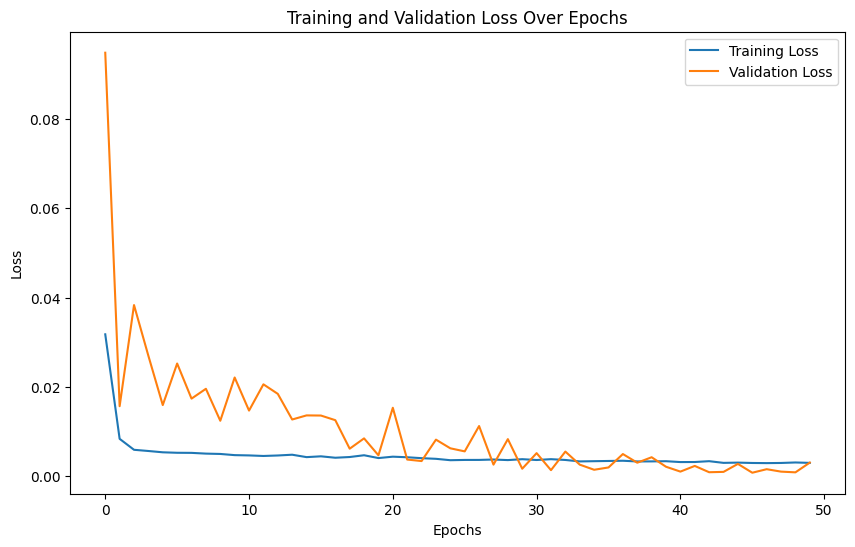

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Step 6.1: Evaluate the Model on the Test Set
# Calculate the Mean Squared Error (MSE) on the test set
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {test_loss}")

# Step 6.2: Make Predictions on the Test Set
# Generate predictions for the test data
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028 
Test Loss (MSE): 0.003043346805498004
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


y_pred_inverse shape: (118,)
y_test_inverse shape: (118,)


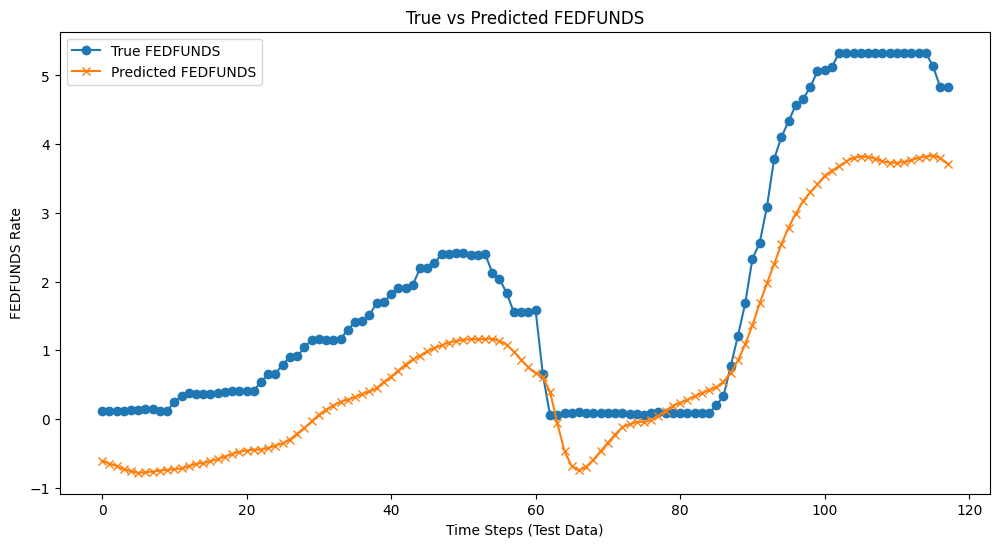

In [ ]:
# Step 6.3: Inverse Transform the Predictions and Actual Values

# Prepare a placeholder array for the inverse transformation
# Fill with zeros for all columns except the FEDFUNDS column
n_features = X_test.shape[2] + 1  # Total features: predictors + target (FEDFUNDS)
y_pred_placeholder = np.zeros((y_pred.shape[0], n_features))
y_test_placeholder = np.zeros((y_test.shape[0], n_features))

# Place the predictions and actual values in the last column (FEDFUNDS)
y_pred_placeholder[:, -1] = y_pred.flatten()
y_test_placeholder[:, -1] = y_test.flatten()

# Perform the inverse transformation
y_pred_inverse = scaler.inverse_transform(y_pred_placeholder)[:, -1]
y_test_inverse = scaler.inverse_transform(y_test_placeholder)[:, -1]

# Verify the shapes
print(f"y_pred_inverse shape: {y_pred_inverse.shape}")
print(f"y_test_inverse shape: {y_test_inverse.shape}")

# Visualize Predictions vs Actuals
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True FEDFUNDS', marker='o')
plt.plot(y_pred_inverse, label='Predicted FEDFUNDS', marker='x')
plt.title('True vs Predicted FEDFUNDS')
plt.xlabel('Time Steps (Test Data)')
plt.ylabel('FEDFUNDS Rate')
plt.legend()
plt.show()


In [ ]:
# Step 6.5: Forecast the Next 4 Months

# Use the last sequence from the test data for forecasting
last_sequence = X_test[-1]  # Shape: (time_steps, features)

forecast = []

for _ in range(4):  # Forecast 4 months ahead
    # Predict the next FEDFUNDS value
    prediction = model.predict(last_sequence.reshape(1, last_sequence.shape[0], last_sequence.shape[1]))

    # Append the prediction to the forecast list
    forecast.append(prediction[0, 0])

    # Prepare the next time step
    # Since we don't have future actual values for other features, we'll assume they remain the same as in the last time step
    new_time_step = last_sequence[-1].copy()  # Copy the last time step
    new_time_step[-1] = prediction[0, 0]      # Update the FEDFUNDS value with the predicted value

    # Update the sequence: remove the oldest time step and add the new time step
    last_sequence = np.append(last_sequence[1:], new_time_step.reshape(1, -1), axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


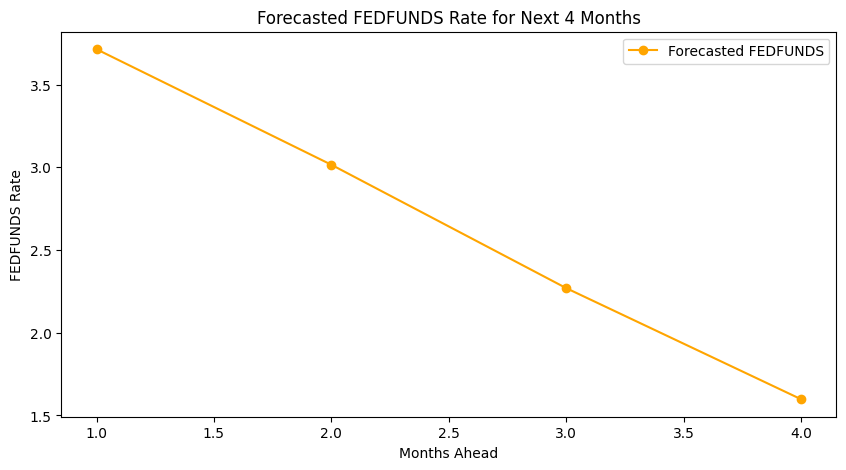

In [ ]:
# Step 6.6: Inverse Transform the Forecasted Values

# Convert the forecast list to a numpy array
forecast_array = np.array(forecast).reshape(-1, 1)

# Create a placeholder array for inverse transformation
n_features = X_test.shape[2] + 1  # Total features including target

forecast_placeholder = np.zeros((forecast_array.shape[0], n_features))

# Place the forecasted FEDFUNDS values in the last column
forecast_placeholder[:, -1] = forecast_array.flatten()

# Perform inverse transformation
forecast_inverse = scaler.inverse_transform(forecast_placeholder)[:, -1]

# Step 6.6: Visualize the Forecast
plt.figure(figsize=(10, 5))
plt.plot(range(1, 5), forecast_inverse, label='Forecasted FEDFUNDS', marker='o', color='orange')
plt.title('Forecasted FEDFUNDS Rate for Next 4 Months')
plt.xlabel('Months Ahead')
plt.ylabel('FEDFUNDS Rate')
plt.legend()
plt.show()


<ipython-input-30-d417e6fcab6a>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start=last_date, periods=5, freq='M')[1:]


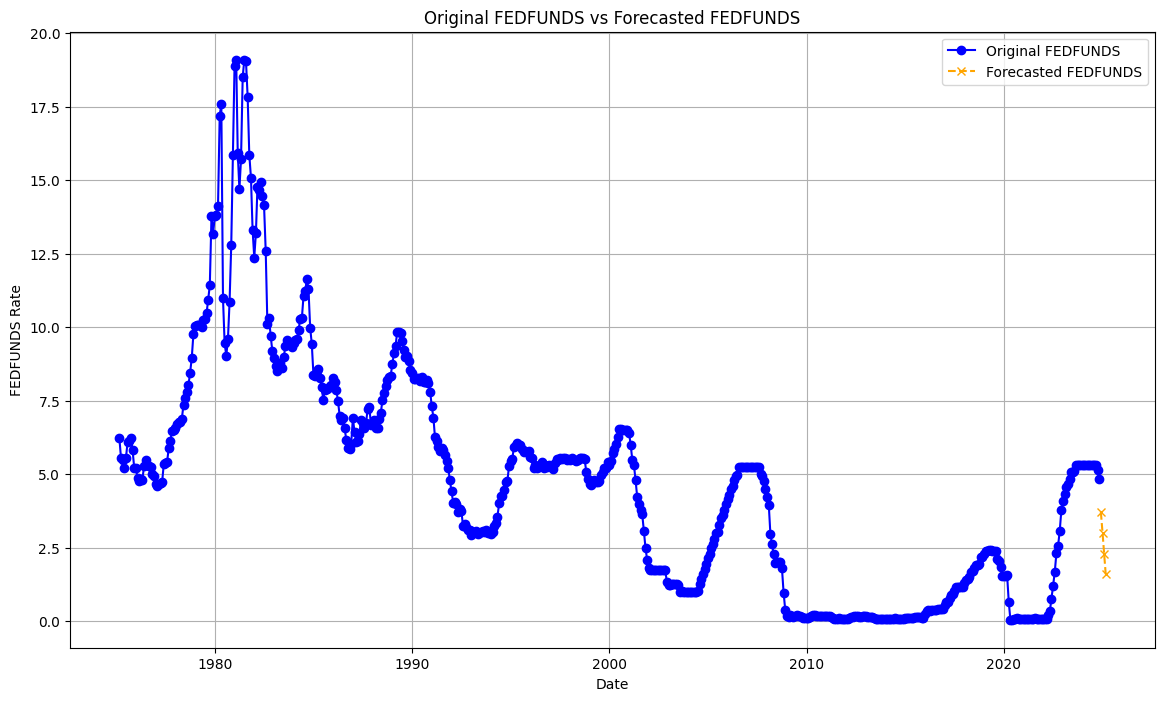

In [ ]:
# Step 7.1: Handle NaT and Generate Forecast Dates
data = data[~data.index.isna()]
data.index = pd.to_datetime(data.index, errors='coerce')

# Drop the last row if its index is NaT
if pd.isnull(data.index[-1]):
    data = data.iloc[:-1]

# Get the last valid date from the index
last_date = data.index[-1]

# Generate forecast dates for the next 4 months
forecast_dates = pd.date_range(start=last_date, periods=5, freq='M')[1:]


# Step 7.2: Create a DataFrame for the Forecasted Values
forecast_df = pd.DataFrame({'FEDFUNDS_Forecast': forecast_inverse}, index=forecast_dates)

# Step 7.3: Augment the Original Dataset with the Forecast
fedfunds_actual = data['FEDFUNDS']
fedfunds_combined = pd.concat([fedfunds_actual, forecast_df['FEDFUNDS_Forecast']], axis=0)

# Step 7.4: Visualization
plt.figure(figsize=(14, 8))
plt.plot(fedfunds_actual.index, fedfunds_actual, label='Original FEDFUNDS', marker='o', color='blue')
plt.plot(forecast_df.index, forecast_df['FEDFUNDS_Forecast'], label='Forecasted FEDFUNDS', marker='x', linestyle='--', color='orange')
plt.title('Original FEDFUNDS vs Forecasted FEDFUNDS')
plt.xlabel('Date')
plt.ylabel('FEDFUNDS Rate')
plt.legend()
plt.grid()
plt.show()


In [ ]:
data.head()

,Industrial_Prod_Index,Housing_price_index,GDP,PCE,Unemployment_rate,USD_EUR_Exchange_Price,Prime_Lending_Rate,Consumer_Sentiment,SNP_CLOSING,FEDFUNDS
DATE,,,,,,,,,,
1975-02-28,40.4252,51.086331,1628.028333,989.4,8.1,0.7222,8.96,85.335374,80.10,6.24
1975-03-31,39.9804,51.172662,1639.940667,990.6,8.6,0.7374,7.93,70.829431,83.78,5.54
1975-04-30,40.0572,51.258993,1651.853000,995.0,8.8,0.7394,7.50,76.826608,84.72,5.49
1975-05-31,39.9402,51.345324,1671.175333,1018.9,9.0,0.7295,7.40,88.918507,90.10,5.22
1975-06-30,40.1927,51.431655,1690.497667,1026.8,8.8,0.7341,7.07,85.897686,92.40,5.55
